In [107]:
# import geopandas and matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt

import plotly.express as px

import plotly.graph_objects as go
import pandas as pd
import geopy

In [2]:
# countries data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/Users/niclapenna/opt/anaconda3/envs/lhl_env/lib/python3.8/site-packages/geopandas/array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


**Print the top 5 rows of world dataframe.**

In [3]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


**Remove continents which have only one country in dataframe.**


In [64]:
# continents with only one country

one_country = world.groupby(by='continent')['name'].count()[lambda x: x == 1]
continent_remove = list(one_country.index)
continent_remove



['Antarctica', 'Seven seas (open ocean)']

In [65]:
# remove these continents

fworld = world[~world['continent'].isin(continent_remove)]
fworld.groupby(by='continent')['name'].count()


continent
Africa           51
Asia             47
Europe           39
North America    18
Oceania           7
South America    13
Name: name, dtype: int64

**Create dataframe with top 3 most populated countries from each continent and store the result in dataframe with name 'world_filtered'.**


In [70]:
pop_continents = list(fworld.groupby(by='continent')['name'].count().sort_values(ascending=False)[0:3].index)
pop_continents

['Africa', 'Asia', 'Europe']

In [73]:
world_filtered = world[world['continent'].isin(pop_continents)]

**Print the 'world_filtered' dataframe.**

In [74]:
world_filtered

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
...,...,...,...,...,...,...
171,2103721,Europe,Macedonia,MKD,29520.0,"POLYGON ((22.38053 42.32026, 22.88137 41.99930..."
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."


-----------------
## Part I: Create a choropleth map of world:

   - First using **Geopandas**
       - Note: Geopandas may not work well on your computers, especially on Windows computers, it is advised to use Google Collab for this assignment. 
   - Second using **Plotly**
       - Note: Plotly may not work well on Jupyter Labs, it is advised to use Jupyter Notebooks or Google Collab for the plotly portion. 


> #### Notes
> * the colors of countries from 'world_filtered' are based on population
> * other countries can stay white

### GeoPandas

/Users/niclapenna/opt/anaconda3/envs/lhl_env/lib/python3.8/site-packages/geopandas/plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/Users/niclapenna/opt/anaconda3/envs/lhl_env/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/Users/niclapenna/opt/anaconda3/envs/lhl_env/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/Users/niclapenna/opt/anaconda3/envs/lhl_env/lib/python3.8/site-packages/geopandas/array.py:373: ShapelyDeprecationWarning:

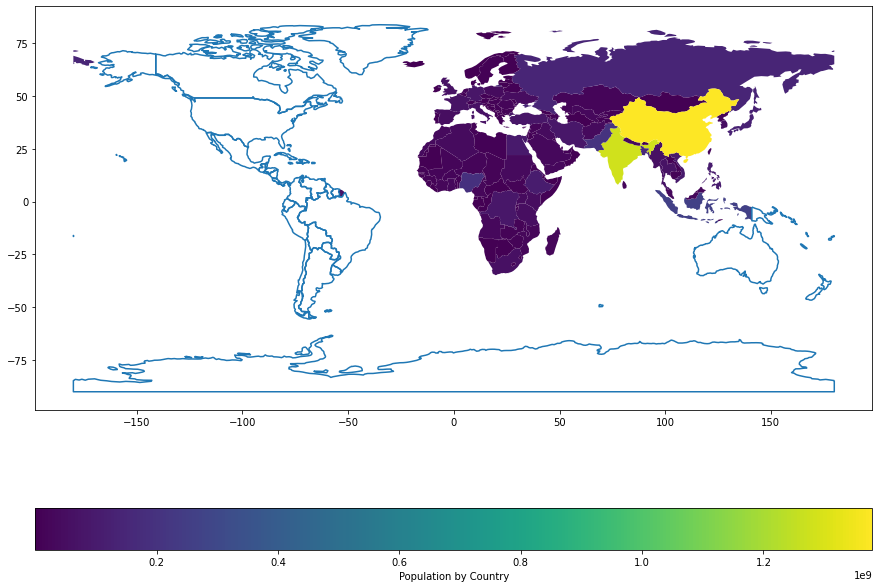

In [86]:
# create figure and axes
fig, ax = plt.subplots(figsize=(15,12))


# create map from world_filtered data-frame
world_filtered.plot(column='pop_est', ax=ax, legend=True,
            legend_kwds={'label': "Population by Country",
                        'orientation': 'horizontal'})



# add the rest of the countries

world[~world['continent'].isin(pop_continents)].boundary.plot(ax=ax)

plt.show()

### Plotly

In [97]:

world_filtered.head()


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."


In [106]:
fig = go.Figure(data=go.Choropleth(
                locations = world_filtered['iso_a3'],
                z = world_filtered['pop_est'],
                text = world_filtered['name'],
))

fig.show()

-----------
## Part II: More Geopandas

In Geopandas:

* add New York, Berlin, Paris, Toronto, Calgary, Tokyo to the map you have created before
    * to get geometry of these cities use the function, **gpd.tools.geocode**(['New York', 'Berlin', 'Paris','Toronto', 'Calgary', 'Tokyo'])
    * if you do not have the geopy library instaled, install it with the following command **in the jupyter notebook cell** `!pip install geopy` 

/Users/niclapenna/opt/anaconda3/envs/lhl_env/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.

/Users/niclapenna/opt/anaconda3/envs/lhl_env/lib/python3.8/site-packages/geopandas/geodataframe.py:35: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.

/Users/niclapenna/opt/anaconda3/envs/lhl_env/lib/python3.8/site-packages/geopandas/plotting.py:38: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

/Users/niclapenna/opt/anaconda3/envs/lhl_env/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely

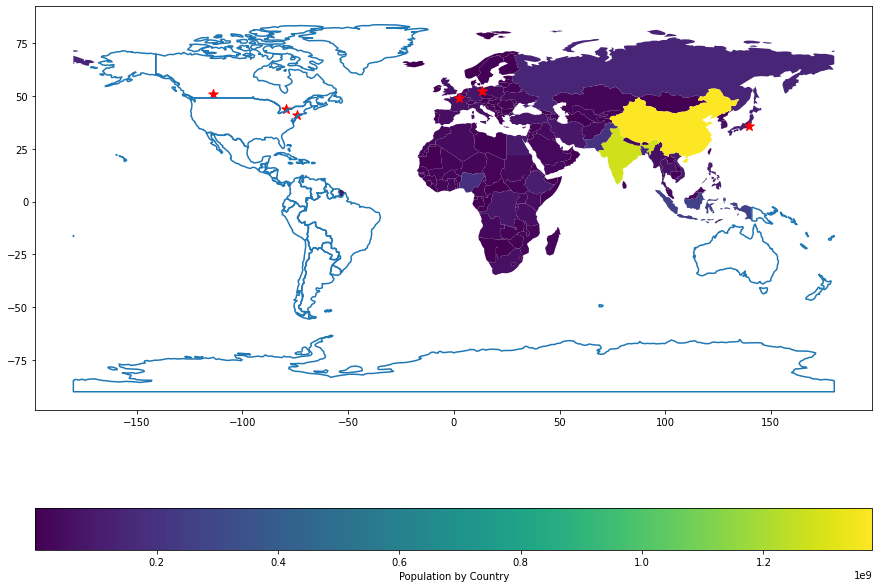

In [116]:
# get geometry
cities_geo = gpd.tools.geocode(['New York', 'Berlin', 'Paris', ' Toronto', 'Calgary', 'Tokyo'], provider='photon')

# create figure and axes
fig, ax = plt.subplots(figsize=(15,12))


# create map from world_filtered data-frame
world_filtered.plot(column='pop_est', ax=ax, legend=True,
            legend_kwds={'label': "Population by Country",
                        'orientation': 'horizontal'})


# add the rest of the countries

world[~world['continent'].isin(pop_continents)].boundary.plot(ax=ax)

# add cities

cities_geo.plot(ax=ax, marker='*', color='red', markersize=100)
plt.show()
